In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sb
import plotly.express as px 
import nltk
import matplotlib.pyplot as mtp
import ssl
import re
import tensorflow as tf 
import tkinter as tk
from tkinter import messagebox
from keras.utils import to_categorical
from tensorflow.keras.layers import Embedding , LSTM , Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from matplotlib import rcParams
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize as wt 
from nltk.stem import WordNetLemmatizer as wl
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder as le 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , confusion_matrix , classification_report

with the help of https://www.analyticsvidhya.com/blog/2021/06/nlp-sentiment-analysis/

In [84]:
# import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()


In [11]:
data = pd.read_csv("file.csv")

In [86]:
data.head(5)

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [87]:
data.info

<bound method DataFrame.info of         Unnamed: 0                                             tweets   labels
0                0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1                1  Try talking with ChatGPT, our new AI system wh...     good
2                2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3                3  THRILLED to share that ChatGPT, our new model ...     good
4                4  As of 2 minutes ago, @OpenAI released their ne...      bad
...            ...                                                ...      ...
219289      219289  Other Software Projects Are Now Trying to Repl...      bad
219290      219290  I asked #ChatGPT to write a #NYE Joke for SEOs...     good
219291      219291  chatgpt is being disassembled until it can onl...      bad
219292      219292  2023 predictions by #chatGPT. Nothing really s...      bad
219293      219293   From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0  neutral

[219294 rows x 3 co

In [88]:
print(data.describe())

          Unnamed: 0
count  219294.000000
mean   109646.500000
std     63304.869303
min         0.000000
25%     54823.250000
50%    109646.500000
75%    164469.750000
max    219293.000000


In [89]:
data.isnull().sum()

Unnamed: 0    0
tweets        0
labels        0
dtype: int64

In [90]:
data.shape

(219294, 3)

In [91]:
data.sample

<bound method NDFrame.sample of         Unnamed: 0                                             tweets   labels
0                0  ChatGPT: Optimizing Language Models for Dialog...  neutral
1                1  Try talking with ChatGPT, our new AI system wh...     good
2                2  ChatGPT: Optimizing Language Models for Dialog...  neutral
3                3  THRILLED to share that ChatGPT, our new model ...     good
4                4  As of 2 minutes ago, @OpenAI released their ne...      bad
...            ...                                                ...      ...
219289      219289  Other Software Projects Are Now Trying to Repl...      bad
219290      219290  I asked #ChatGPT to write a #NYE Joke for SEOs...     good
219291      219291  chatgpt is being disassembled until it can onl...      bad
219292      219292  2023 predictions by #chatGPT. Nothing really s...      bad
219293      219293   From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0  neutral

[219294 rows x 3 co

Applying Sentiment Analysis

In [92]:
unique_values = data['labels'].value_counts()
print(unique_values)
num_categories = len(unique_values)
num_categories

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64


3

In [12]:
label_encode = le()
data.labels = label_encode.fit_transform(data.labels)

In [94]:
data.head(5)

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,2
1,1,"Try talking with ChatGPT, our new AI system wh...",1
2,2,ChatGPT: Optimizing Language Models for Dialog...,2
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0


<Axes: xlabel='labels', ylabel='count'>

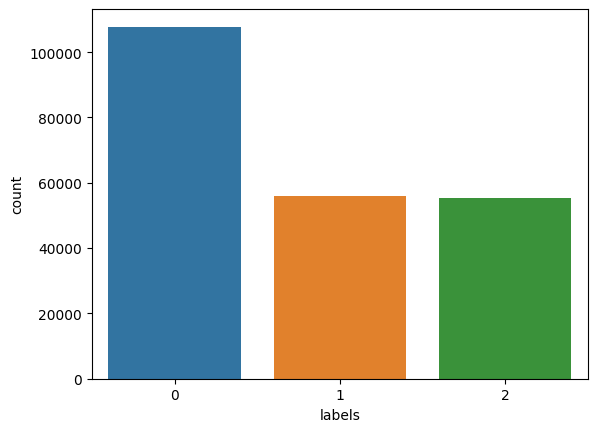

In [95]:
sb.countplot(x = "labels" , data=data)

In [96]:
def clean(text):
    corpus = []
    for j in text:
        n_text = re.sub(r'[^\w\s]', '', str(j))  # Corrected punctuation removal
        n_text = n_text.lower()
        tokens = wt(n_text)
        stop_words = set(stopwords.words('english'))  # Fixed variable name
        remove_sw = [i for i in tokens if i not in stop_words]
        lemme = wl()
        n_text = [lemme.lemmatize(i) for i in remove_sw]
        corpus.append(' '.join(str(x) for x in n_text))
    return corpus

In [101]:
s = clean(data['tweets'])

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [ ]:
print(s)

In [ ]:
data['tweets']

0         ChatGPT: Optimizing Language Models for Dialog...
1         Try talking with ChatGPT, our new AI system wh...
2         ChatGPT: Optimizing Language Models for Dialog...
3         THRILLED to share that ChatGPT, our new model ...
4         As of 2 minutes ago, @OpenAI released their ne...
                                ...                        
219289    Other Software Projects Are Now Trying to Repl...
219290    I asked #ChatGPT to write a #NYE Joke for SEOs...
219291    chatgpt is being disassembled until it can onl...
219292    2023 predictions by #chatGPT. Nothing really s...
219293     From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0
Name: tweets, Length: 219294, dtype: object

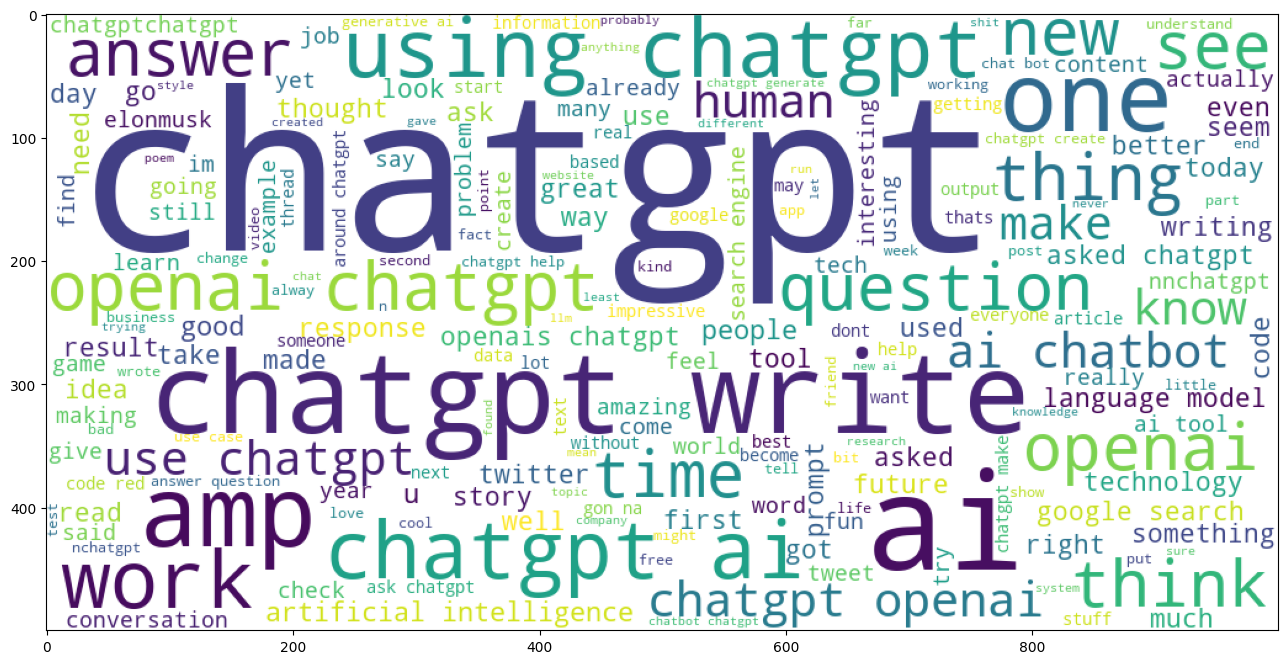

In [ ]:
rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in s:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
mtp.imshow(wordcloud)

# Bag of Words

Now, we will use the Bag of Words Model(BOW), which is used to represent the text in the form of a bag of words,i.e. the grammar and the order of words in a sentence are not given any importance, instead, multiplicity,i.e. (the number of times a word occurs in a document) is the main point of concern.

Basically, it describes the total occurrence of words within a document.

Scikit-Learn provides a neat way of performing the bag of words technique using CountVectorizer.

In [102]:
cv = CountVectorizer(ngram_range=(1,2))
X = cv.fit_transform(s)
y = data.labels
X_train, X_test, y_train, y_test = tts(X, y, 
                                       test_size=0.25, 
                                       random_state=122)

In [33]:
rc = RandomForestClassifier()
parameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [34]:
grid_search = GridSearchCV(rc, 
                           parameters, 
                           cv=5, 
                           return_train_score=True,
                           n_jobs=2)


In [ ]:
grid_search.fit(X_test,y_test)

In [ ]:
grid_search.best_params_

In [ ]:
rfcs = RandomForestClassifier(max_features='sqrt',
                                      max_depth=10,
                                      n_estimators=200,
                                      min_samples_split=5,
                                      min_samples_leaf=4,
                                      bootstrap=True)
rfcs.fit(X_train,y_train)
    

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200)

In [ ]:
predictions = rfcs.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rcParams['figure.figsize'] = 10,5
confusion_matrix(y_test,predictions)



array([[27187,     0,     0],
       [13889,     0,     0],
       [13726,     0,    22]])

In [ ]:
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions,average = "micro")
rec_score = recall_score(y_test,predictions,average = "micro")
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)

Accuracy_score:  0.4962972420837589
Precision_score:  0.4962972420837589
Recall_score:  0.4962972420837589


In [ ]:
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     27187
           1       0.00      0.00      0.00     13889
           2       1.00      0.00      0.00     13748

    accuracy                           0.50     54824
   macro avg       0.50      0.33      0.22     54824
weighted avg       0.50      0.50      0.33     54824



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [ ]:
def expression_check(prediction_input):
    if prediction_input == 0:
        print("Input statement has Negative Sentiment.")
    elif prediction_input == 1:
        print("Input statement has Positive Sentiment.")
    else:
        print("Invalid Statement.")
# function to take the input statement and perform the same transformations we did earlier
def sentiment_predictor(input):
    input = clean(input)
    transformed_input = cv.transform(input)
    prediction = rfcs.predict(transformed_input)
    expression_check(prediction)
input1 = ["ChatGpt just want to punch someone in the face."]
input2 = ["I bought a AI and it's so good."]
sentiment_predictor(input1)
sentiment_predictor(input2)

Input statement has Negative Sentiment.
Input statement has Negative Sentiment.


In [2]:
df = pd.read_csv("file.csv")

In [3]:
df.head(5)

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [4]:
def clean(text):
    corpus = []
    for j in text:
        n_text = re.sub(r'[^\w\s]', '', str(j))  # Corrected punctuation removal
        n_text = n_text.lower()
        tokens = wt(n_text)
        n_text = re.sub(r'http[s]?://\S+', '', str(j))  # Corrected variable name
        stop_words = set(stopwords.words('english'))  # Fixed variable name
        remove_sw = [i for i in tokens if i not in stop_words]
        lemme = wl()
        n_text = [lemme.lemmatize(i) for i in remove_sw]  # Lemmatize each word
        n_text = [word for word in n_text if not word.startswith('http')]
        corpus.append(' '.join(str(x) for x in n_text))
    return corpus
    

In [5]:
cleaned_df = clean(df['tweets'])

In [6]:
cleaned_df

['chatgpt optimizing language model dialogue openai',
 'try talking chatgpt new ai system optimized dialogue feedback help u improve',
 'chatgpt optimizing language model dialogue ai machinelearning datascience artificialintelligencenntrending aiml article identified amp digested via granola machinedriven r bot ramsey elbasheer',
 'thrilled share chatgpt new model optimized dialog public free accessible everyone',
 '2 minute ago openai released new chatgpt nnand use right',
 'launched chatgpt new ai system optimized dialogue',
 '2 minute ago openai released new chatgpt nnand use right n nhttpstcokucnwyhq1bnn',
 'chatgpt coming strong refusing help stalk someone agreeing providing someone waldo',
 '0penal deployed thing ive helping build last couple month chatbot based gpt 3 im really excited share vlnhttpstcozp7hniuxbunhttpstconisjlwhomw',
 'research preview newest model chatgptnnwere trying something new preview free immediately available everyone waitlist',
 'god damn openai stop ann

In [7]:
df['tweets'] = cleaned_df

In [8]:
df

,Unnamed: 0,tweets,labels
0,0,chatgpt optimizing language model dialogue openai,neutral
1,1,try talking chatgpt new ai system optimized di...,good
2,2,chatgpt optimizing language model dialogue ai ...,neutral
3,3,thrilled share chatgpt new model optimized dia...,good
4,4,2 minute ago openai released new chatgpt nnand...,bad
...,...,...,...
219289,219289,software project trying replicate chatgpt,bad
219290,219290,asked chatgpt write nye joke seos delivered nn...,good
219291,219291,chatgpt disassembled dissemble,bad
219292,219292,2023 prediction chatgpt nothing really specifi...,bad


# NN


In [13]:
df['labels'] = label_encode.fit_transform(df['labels'])

In [14]:
df

,Unnamed: 0,tweets,labels
0,0,chatgpt optimizing language model dialogue openai,2
1,1,try talking chatgpt new ai system optimized di...,1
2,2,chatgpt optimizing language model dialogue ai ...,2
3,3,thrilled share chatgpt new model optimized dia...,1
4,4,2 minute ago openai released new chatgpt nnand...,0
...,...,...,...
219289,219289,software project trying replicate chatgpt,0
219290,219290,asked chatgpt write nye joke seos delivered nn...,1
219291,219291,chatgpt disassembled dissemble,0
219292,219292,2023 prediction chatgpt nothing really specifi...,0


In [17]:
tokenizer = Tokenizer()

In [18]:
tokenizer.fit_on_texts(df['tweets'])
seq = tokenizer.texts_to_sequences(df['tweets'])
max_seq = max(len(sq) for sq in seq)
padded_sequences = pad_sequences(seq
                                 , maxlen=max_seq, 
                                 padding='post')

print("Tokenized Sequences:")
seq
print("\nPadded Sequences:")
padded_sequences
print("\nLabels:")
print(df['labels'])

Tokenized Sequences:

Padded Sequences:

Labels:
0         2
1         1
2         2
3         1
4         0
         ..
219289    0
219290    1
219291    0
219292    0
219293    2
Name: labels, Length: 219294, dtype: int64


In [19]:
vocab_size = len(tokenizer.word_index) + 1 
embeddding_dim = 50

In [20]:
X = padded_sequences
y = df['labels']

In [21]:
X_train , X_test , y_train , y_test = tts(
    X , y , test_size = 0.24 , 
    random_state = 42
)

In [22]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (166663, 47)
y_train shape: (166663,)
X_test shape: (52631, 47)
y_test shape: (52631,)


In [23]:
y_train = to_categorical(y_train, 
                                 num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [ ]:
models = Sequential([
    Embedding(input_dim = vocab_size , 
              output_dim = embeddding_dim , 
              input_length = max_seq) , 
    LSTM(units = 128) , 
    Dense(units = 3 , 
          activation = "softmax")
])

In [ ]:
models.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])


In [ ]:
models.fit(
    X_train, y_train, 
    epochs=10, 
    batch_size=64, 
    validation_data=(X_test, y_test))

Epoch 1/10
2605/2605 [==============================] - 197s 75ms/step - loss: 0.4684 - accuracy: 0.8206 - val_loss: 0.3405 - val_accuracy: 0.8871
Epoch 2/10
2605/2605 [==============================] - 196s 75ms/step - loss: 0.2496 - accuracy: 0.9181 - val_loss: 0.3293 - val_accuracy: 0.8849
Epoch 3/10
2605/2605 [==============================] - 208s 80ms/step - loss: 0.1652 - accuracy: 0.9481 - val_loss: 0.3401 - val_accuracy: 0.8908
Epoch 4/10
2605/2605 [==============================] - 235s 90ms/step - loss: 0.1180 - accuracy: 0.9634 - val_loss: 0.3996 - val_accuracy: 0.8847
Epoch 5/10
2605/2605 [==============================] - 203s 78ms/step - loss: 0.0900 - accuracy: 0.9722 - val_loss: 0.4225 - val_accuracy: 0.8831
Epoch 6/10
2605/2605 [==============================] - 214s 82ms/step - loss: 0.0702 - accuracy: 0.9781 - val_loss: 0.4741 - val_accuracy: 0.8791
Epoch 7/10
2605/2605 [==============================] - 209s 80ms/step - loss: 0.0573 - accuracy: 0.9819 - val_loss: 0

In [ ]:
y_pred_prob = models.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

1645/1645 [==============================] - 19s 11ms/step


In [ ]:
y_test


array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
y_pred

array([0, 0, 2, ..., 0, 1, 0])

In [ ]:
y_test


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
accs_score = accuracy_score(y_test,y_pred)
pres_score = precision_score(y_test,y_pred,average = "macro")
recs_score = recall_score(y_test,y_pred,average = "macro")
print('Accuracy_score: ',accs_score)
print('Precision_score: ',pres_score)
print('Recall_score: ',recs_score)

Accuracy_score:  0.87165358818947
Precision_score:  0.8539731192403766
Recall_score:  0.8638400242803878


In [30]:
def class_to_label(predicted_class):
    if predicted_class == 0:
        return "bad"
    elif predicted_class == 2:
        return "neutral"
    elif predicted_class == 1:
        return "good"
    else:
        return "unknown"

In [ ]:
custom_input = ["ChatGPT: Optimizing Language Models for Dialogue - OpenAI has recently launched ChatGPT, a new AI system optimized for dialogue. This system is designed to provide feedback and improve conversations, making it accessible to everyone. The latest model, ChatGPT, uses machine learning and artificial intelligence techniques to optimize language models for dialogue. It's an exciting development in the field of AI and has generated a lot of buzz. I'm thrilled to share this news and explore the potential of ChatGPT in various applications."]
custom_input = clean(custom_input)


custom_input = tokenizer.texts_to_sequences(custom_input)
custom_input = pad_sequences(custom_input, maxlen=max_seq)

predictions = models.predict(custom_input)

predicted_class = np.argmax(predictions)
predicted_label = class_to_label(predicted_class)

print("Predicted class:", predicted_label)

1/1 [==============================] - 0s 16ms/step
Predicted class: good


In [ ]:
# Function to preprocess the input
def preprocess_input(custom_input):
    # Tokenize the input
    custom_input = tokenizer.texts_to_sequences([custom_input])
    # Pad the sequences
    custom_input = pad_sequences(custom_input, maxlen=max_seq, padding='post')
    return custom_input

# Function to map predicted class to label
def class_to_label(predicted_class):
    if predicted_class == 0:
        return "bad"
    elif predicted_class == 1:
        return "neutral"
    elif predicted_class == 2:
        return "good"
    else:
        return "unknown"

# Function to get prediction and display result
def get_prediction():
    try:
        # Get input from entry widget
        custom_input_text = entry.get()
        # Preprocess the input
        custom_input_processed = preprocess_input(custom_input_text)
        # Predict sentiment label
        predictions = models.predict(custom_input_processed)
        predicted_class = np.argmax(predictions)
        # Map predicted class to label
        predicted_label = class_to_label(predicted_class)
        # Display result in message box
        messagebox.showinfo("Prediction Result", f"The sentiment label is: {predicted_label}")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")

# Create Tkinter window
root = tk.Tk()
root.title("Sentiment Analysis Predictor")

# Create entry widget
entry = tk.Entry(root, width=50)
entry.pack(pady=10)

# Create predict button
predict_button = tk.Button(root, text="Predict", command=get_prediction)
predict_button.pack(pady=5)

# Run Tkinter event loop
root.mainloop()

1/1 [==============================] - 0s 16ms/step


In [ ]:
models.save("sentiment_analysis_model.h5")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
models.save('sentiment_analysis_model.keras')

# DECiSION TREE CLASSIFIER

In [24]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred_dt = classifier.predict(X_test)

In [27]:
y_pred_dt 

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [29]:
y_pred_dt = np.argmax(y_pred_dt, axis=1)
y_pred_dt

array([0, 0, 0, ..., 1, 1, 2])

In [32]:
accs_score = accuracy_score(np.argmax(y_test, axis=1),y_pred_dt)
pres_score = precision_score(np.argmax(y_test, axis=1),y_pred_dt,average = "macro")
recs_score = recall_score(np.argmax(y_test, axis=1),y_pred_dt,average = "macro")
print('Accuracy_score: ',accs_score)
print('Precision_score: ',pres_score)
print('Recall_score: ',recs_score)

Accuracy_score:  0.5107066177727955
Precision_score:  0.4753925300234103
Recall_score:  0.4758896588629731


In [39]:
from textblob import TextBlob

# Example text

df['sentiment'] = df['tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral
def classify_sentiment(polarity):
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the classification function to the sentiment column
df['sentiment_class'] = df['sentiment'].apply(classify_sentiment)

# Display the DataFrame with sentiment analysis results
print(df[['tweets', 'sentiment', 'sentiment_class']])

                                                   tweets  sentiment  \
0       chatgpt optimizing language model dialogue openai   0.000000   
1       try talking chatgpt new ai system optimized di...   0.136364   
2       chatgpt optimizing language model dialogue ai ...   0.000000   
3       thrilled share chatgpt new model optimized dia...   0.302273   
4       2 minute ago openai released new chatgpt nnand...   0.211039   
...                                                   ...        ...   
219289          software project trying replicate chatgpt   0.000000   
219290  asked chatgpt write nye joke seos delivered nn...   0.021591   
219291                     chatgpt disassembled dissemble   0.000000   
219292  2023 prediction chatgpt nothing really specifi...  -0.125000   
219293                                 chatgpt neat stuff   0.000000   

       sentiment_class  
0              Neutral  
1             Positive  
2              Neutral  
3             Positive  
4         